In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow.keras.layers import Input,Add,Flatten, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mannatsadana","key":"8ca27bc319ce3ac23ddef15ee6521764"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [ ]:
!kaggle datasets download -d stoicstatic/india-stock-data-nse-1990-2020


Dataset URL: https://www.kaggle.com/datasets/stoicstatic/india-stock-data-nse-1990-2020
License(s): CC0-1.0
 93% 162M/175M [00:01<00:00, 135MB/s]
100% 175M/175M [00:01<00:00, 130MB/s]


In [ ]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("india-stock-data-nse-1990-2020.zip", "r") as zip_ref:
    zip_ref.extractall("IndiaStockData")

# Verify files in directory
os.listdir("IndiaStockData")

['Datasets']

In [ ]:
# import pandas as pd

# Load data
file_path = "IndiaStockData/Datasets/SCRIP/20MICRONS.csv"  # Replace with the correct file name after checking directory contents
data = pd.read_csv(file_path)

# Display first few rows
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-10-06,20MICRONS,EQ,55.00,80.0,80.0,31.60,33.55,33.65,41.27,11750865,4.849072e+13,NaN,991550,0.0844
1,2008-10-07,20MICRONS,EQ,33.65,32.0,38.0,27.85,30.05,30.10,31.51,4556711,1.435988e+13,NaN,333621,0.0732
2,2008-10-08,20MICRONS,EQ,30.10,28.0,29.2,25.10,26.40,26.50,26.85,1232192,3.309046e+12,NaN,92240,0.0749
3,2008-10-10,20MICRONS,EQ,26.50,24.9,24.9,21.65,23.65,23.20,23.50,603964,1.419308e+12,NaN,113128,0.1873
4,2008-10-13,20MICRONS,EQ,23.20,24.3,26.6,23.30,24.70,24.65,25.37,449346,1.140129e+12,NaN,93847,0.2089


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']].dropna()  # Use only the 'Close' column

In [ ]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Split into training and testing datasets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [ ]:
# Create dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0122
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0023
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0023
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0016
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0014
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0016
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0021
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0013
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0011
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0011
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 9.3025e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0012
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 9.6744e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0010
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0010
Epoch 1

In [ ]:
# Predict on test data
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
# Evaluate LSTM
lstm_r2 = r2_score(y_test_actual, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)

print(f"LSTM R² Value: {lstm_r2}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")


LSTM R² Value: 0.9518220770683071
LSTM RMSE: 1.7920622194669356
LSTM MAE: 1.2286196645100913


In [ ]:
# Predict next 30 days
def predict_next_30_days(model, last_data, scaler, time_step=60):
    predictions = []
    input_sequence = last_data[-time_step:]
    for _ in range(30):
        input_sequence_reshaped = input_sequence.reshape(1, time_step, 1)
        next_prediction = model.predict(input_sequence_reshaped)[0][0]
        predictions.append(next_prediction)
        input_sequence = np.append(input_sequence[1:], next_prediction)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

lstm_30_day_predictions = predict_next_30_days(lstm_model, data_scaled, scaler)
print("LSTM 30-Day Forecasted Prices:", lstm_30_day_predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [ ]:
#USING TIME SERIES TRANSFORMER

         Date     Symbol Series  Prev Close  Open  High    Low   Last  Close  \
0  2008-10-06  20MICRONS     EQ       55.00  80.0  80.0  31.60  33.55  33.65   
1  2008-10-07  20MICRONS     EQ       33.65  32.0  38.0  27.85  30.05  30.10   
2  2008-10-08  20MICRONS     EQ       30.10  28.0  29.2  25.10  26.40  26.50   
3  2008-10-10  20MICRONS     EQ       26.50  24.9  24.9  21.65  23.65  23.20   
4  2008-10-13  20MICRONS     EQ       23.20  24.3  26.6  23.30  24.70  24.65   

    VWAP    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  41.27  11750865  4.849072e+13     NaN              991550       0.0844  
1  31.51   4556711  1.435988e+13     NaN              333621       0.0732  
2  26.85   1232192  3.309046e+12     NaN               92240       0.0749  
3  23.50    603964  1.419308e+12     NaN              113128       0.1873  
4  25.37    449346  1.140129e+12     NaN               93847       0.2089  


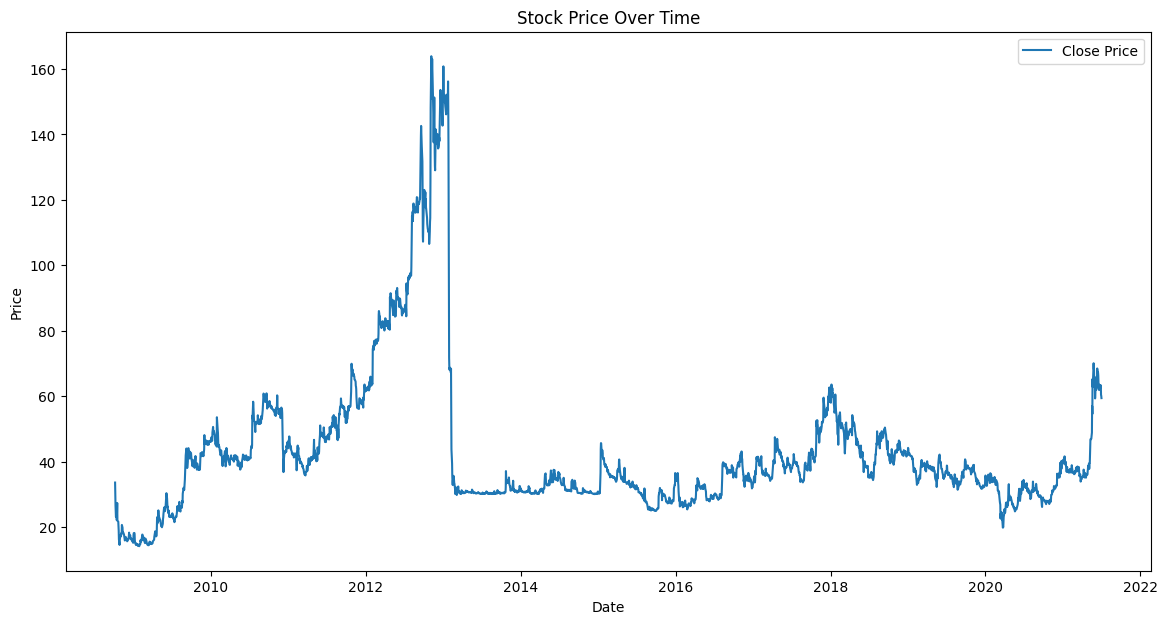

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0153 - val_loss: 9.6277e-04
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0042 - val_loss: 3.4880e-04
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0022 - val_loss: 2.4567e-04
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019 - val_loss: 2.6302e-04
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0018 - val_loss: 4.9178e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0020 - val_loss: 4.2242e-04
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0015 - val_loss: 3.4226e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0014 - val_loss: 2.1730e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0015 - val_loss: 1.9361e-04
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0013 - val_loss: 1.5784e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0011 - val_loss: 1.9355e-04
Epoch 12/50
78/78 ━

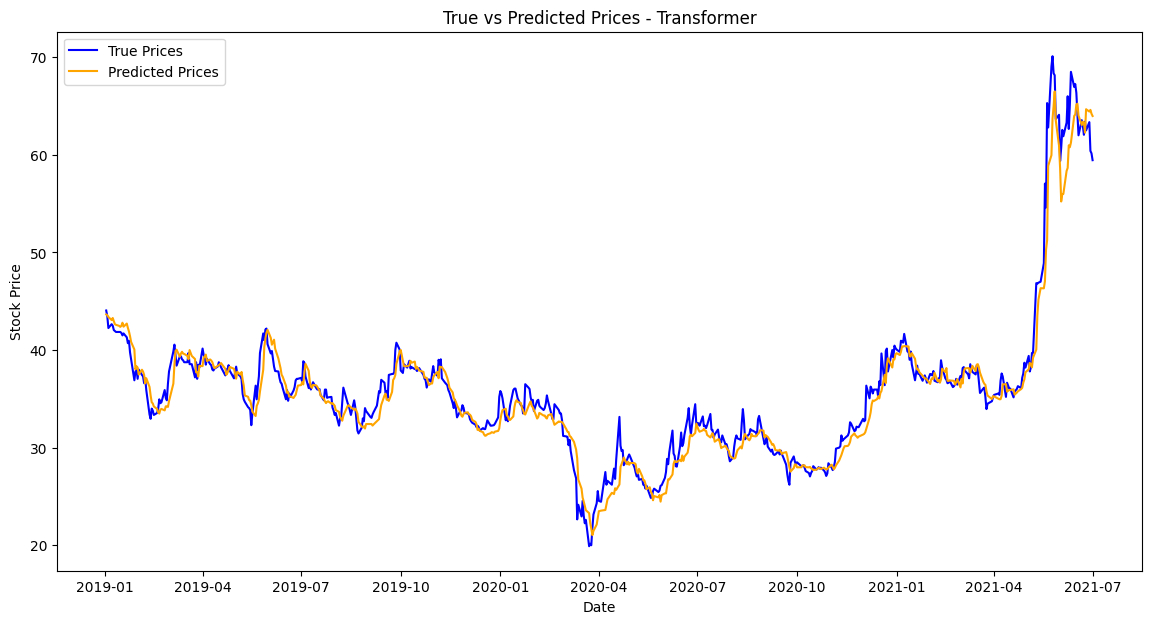

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<ipython-input-26-45f52d2536a8>:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

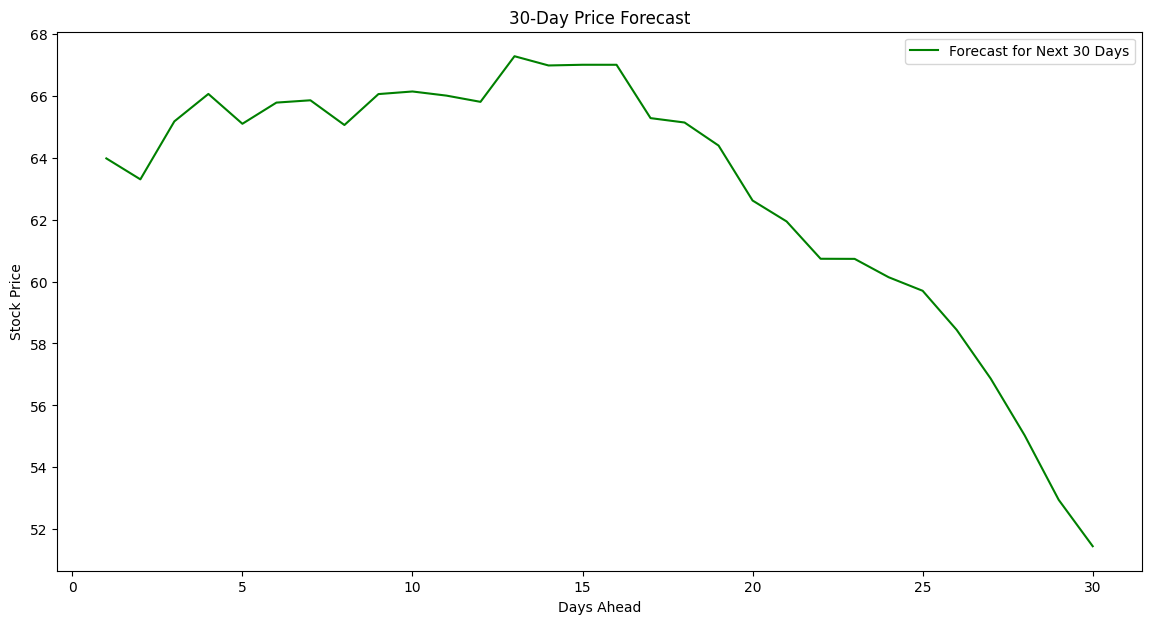

30-Day Forecasted Prices:
[63.974766 63.298477 65.171104 66.056206 65.09269  65.776596 65.85117
 65.053154 66.05176  66.13547  66.00207  65.80081  67.27398  66.97569
 66.99813  66.99753  65.27542  65.13364  64.38911  62.614716 61.939846
 60.734417 60.730946 60.138535 59.70053  58.439354 56.866722 55.03163
 52.951145 51.453278]


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, Dropout, LayerNormalization, Add, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the stock data (ensure the path is correct)
file_path = "IndiaStockData/Datasets/SCRIP/20MICRONS.csv"  # Replace with the correct file name after checking directory contents
data = pd.read_csv(file_path)

# Display first few rows of the dataset
print(data.head())

# Ensure the 'Date' column is datetime type and set it as index if necessary
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use 'Close' price for prediction
data = data[['Close']]

# Plot the closing price data to visualize
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Scale data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Function to create dataset for training
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Set time_step for the dataset (e.g., use last 60 days to predict the next day's price)
time_step = 60
X, y = create_dataset(data_scaled, time_step)

# Split data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the Transformer model
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)

    # Transformer encoder layer
    attention = MultiHeadAttention(num_heads=8, key_dim=32)(inputs, inputs)
    attention = Dropout(0.2)(attention)
    attention = LayerNormalization(epsilon=1e-6)(attention)

    # Add residual connection
    x = Add()([inputs, attention])

    # Dense layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Initialize and compile the model
input_shape = (X_train.shape[1], X_train.shape[2])
transformer_model = build_transformer_model(input_shape)
transformer_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Predict on the test set
transformer_predictions = transformer_model.predict(X_test)
transformer_predictions = scaler.inverse_transform(transformer_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
transformer_r2 = r2_score(y_test_actual, transformer_predictions)
transformer_rmse = np.sqrt(mean_squared_error(y_test_actual, transformer_predictions))
transformer_mae = mean_absolute_error(y_test_actual, transformer_predictions)

# Print evaluation metrics
print(f"Transformer R² Value: {transformer_r2:.4f}")
print(f"Transformer RMSE: {transformer_rmse:.4f}")
print(f"Transformer MAE: {transformer_mae:.4f}")

# Plot true vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="True Prices", color="blue")
plt.plot(data.index[-len(y_test_actual):], transformer_predictions, label="Predicted Prices", color="orange")
plt.title("True vs Predicted Prices - Transformer")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict for the next 30 days using the last sequence
last_sequence = X_test[-1]
forecast = []
for _ in range(30):
    pred = transformer_model.predict(last_sequence[np.newaxis, :, :])
    forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = pred

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot 30-day forecast
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), forecast, label="Forecast for Next 30 Days", color="green")
plt.title("30-Day Price Forecast")
plt.xlabel("Days Ahead")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Print forecasted prices
print("30-Day Forecasted Prices:")
print(forecast.flatten())


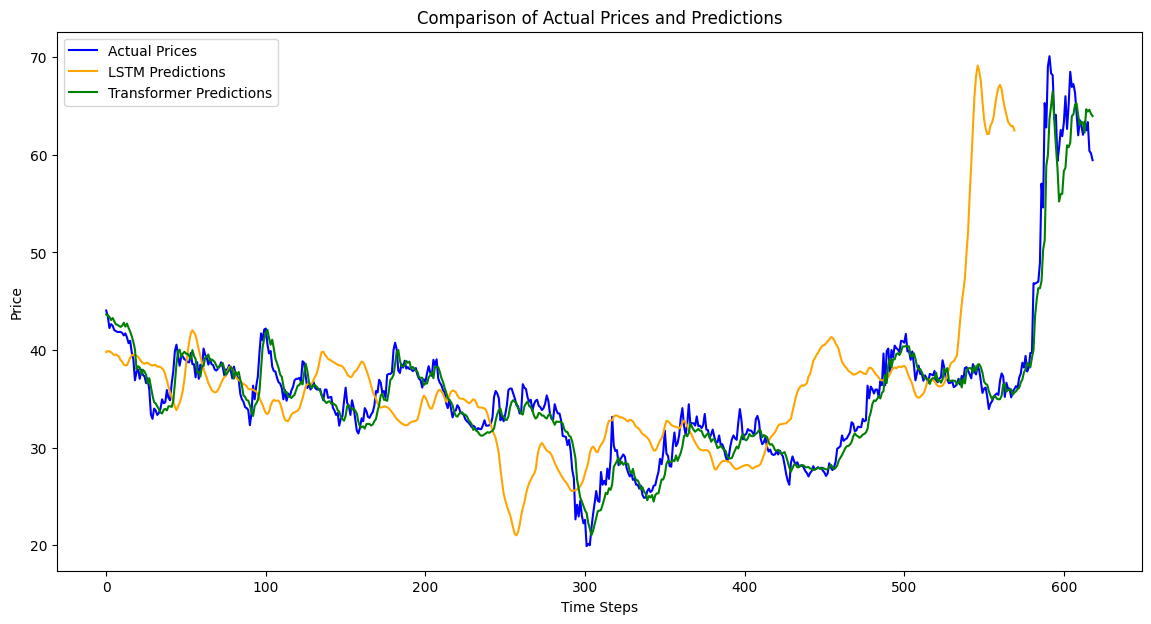

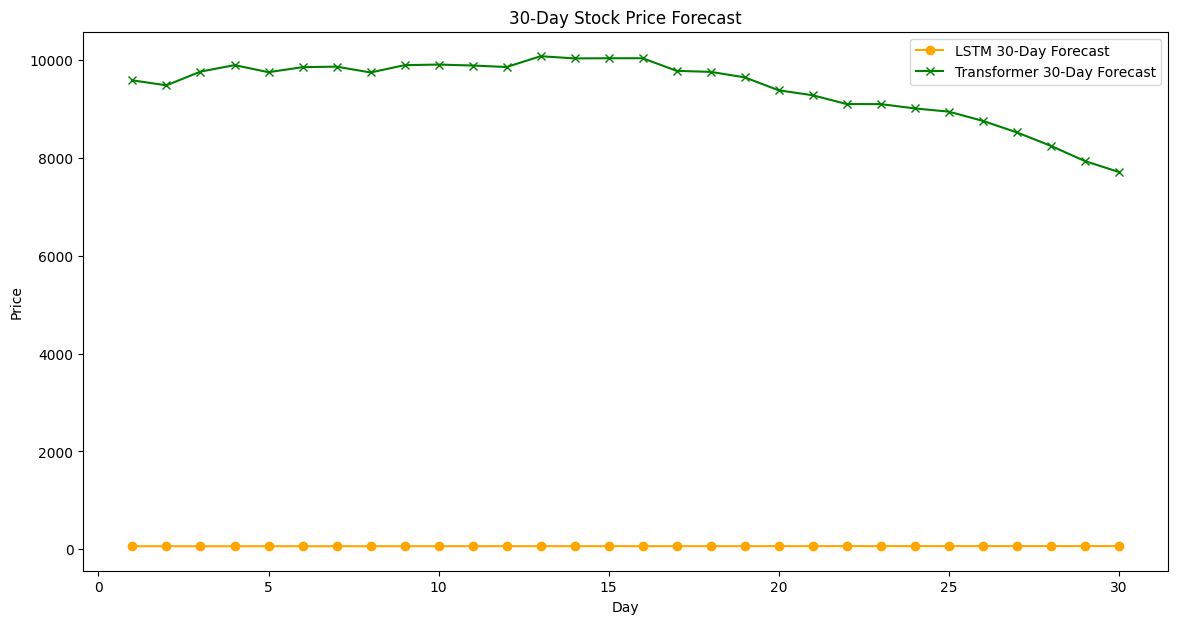

In [ ]:
# Assuming the transformer model is already trained and `transformer_predictions` are available.

# # Generate Transformer 30-Day Forecast (if you haven't already)
# last_sequence_transformer = X_test[-1]  # Take the last sequence from the test set
# transformer_30_day_predictions = []
# for _ in range(30):
#     pred = transformer_model.predict(last_sequence_transformer[np.newaxis, :, :])
#     transformer_30_day_predictions.append(pred[0, 0])
#     last_sequence_transformer = np.roll(last_sequence_transformer, -1, axis=0)
#     last_sequence_transformer[-1, 0] = pred  # Update with the predicted value

# Inverse scale the predictions if necessary
transformer_30_day_predictions = scaler.inverse_transform(np.array(transformer_30_day_predictions).reshape(-1, 1))

# Now plot the comparisons
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='orange')
plt.plot(transformer_predictions, label='Transformer Predictions', color='green')
plt.title("Comparison of Actual Prices and Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot the 30-day forecasts
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), lstm_30_day_predictions, label='LSTM 30-Day Forecast', color='orange', marker='o')
plt.plot(range(1, 31), transformer_30_day_predictions, label='Transformer 30-Day Forecast', color='green', marker='x')
plt.title("30-Day Stock Price Forecast")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


<ipython-input-34-b7246f636619>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_range = np.arange(min_price, max_price + y_step, y_step)


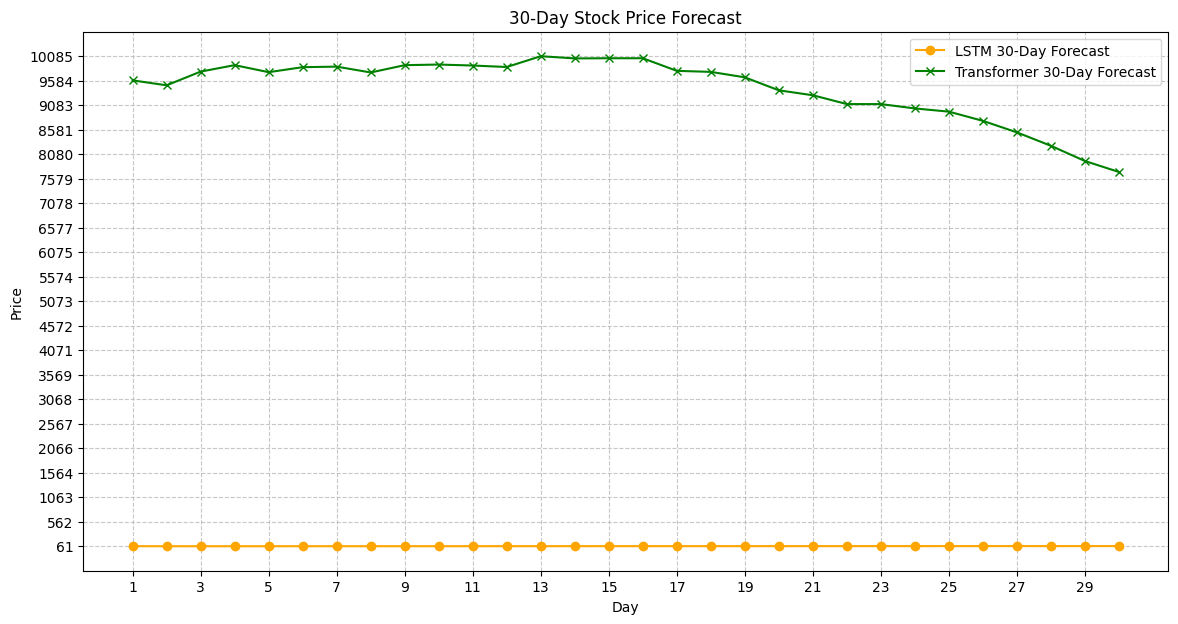

In [ ]:
# import numpy as np

# # Plot the 30-day forecasts with y-axis intervals of 100
# plt.figure(figsize=(14, 7))
# plt.plot(range(1, 31), lstm_30_day_predictions, label='LSTM 30-Day Forecast', color='orange', marker='o')
# plt.plot(range(1, 31), transformer_30_day_predictions, label='Transformer 30-Day Forecast', color='green', marker='x')

# # Setting title and labels
# plt.title("30-Day Stock Price Forecast")
# plt.xlabel("Day")
# plt.ylabel("Price")

# # Configure y-axis intervals
# min_price = int(min(min(lstm_30_day_predictions), min(transformer_30_day_predictions)) // 100 * 100)  # Round down to nearest 100
# max_price = int(max(max(lstm_30_day_predictions), max(transformer_30_day_predictions)) // 100 * 100 + 100)  # Round up to nearest 100
# plt.yticks(np.arange(min_price, max_price + 100, 100))  # Intervals of 100

# # Adding legend
# plt.legend()

# # Show the plot
# plt.show()


# Plot the 30-day forecasts with reduced intervals
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), lstm_30_day_predictions, label='LSTM 30-Day Forecast', color='orange', marker='o')
plt.plot(range(1, 31), transformer_30_day_predictions, label='Transformer 30-Day Forecast', color='green', marker='x')

# Adjusting intervals on the x-axis (every 2 days)
plt.xticks(ticks=range(1, 31, 2))

# Adjusting intervals on the y-axis with smaller step values
min_price = min(min(lstm_30_day_predictions), min(transformer_30_day_predictions))
max_price = max(max(lstm_30_day_predictions), max(transformer_30_day_predictions))
y_step = (max_price - min_price) / 20  # Smaller step size for finer intervals
y_range = np.arange(min_price, max_price + y_step, y_step)
plt.yticks(ticks=y_range)

# Titles and labels
plt.title("30-Day Stock Price Forecast")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better visualization
plt.show()
